In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# # MERGING DATA
# data1 = pd.read_csv('Crime_Data_from_2010_to_2019.csv')
# data2 = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# merged_data = pd.concat([data1, data2])
# merged_data.to_csv('data.csv')

In [81]:
# IMPORT DATA
data = pd.read_csv('data.csv')

In [82]:
# Adding day of week 

# from datetime import datetime
# days = data['DATE OCC'].tolist()
# day_of_week = list()
# for i in days:
#     day_of_week.append((datetime.strptime(i, '%m/%d/%Y %H:%M:%S %p')).isoweekday())

# data['DAY IN WEEK'] = day_of_week
# data.to_csv('data.csv')


In [83]:
# All the possible weapons
weapons = data['Weapon Desc'].unique()

In [96]:
# List of country code
data2 = pd.read_csv('HourCountyMonth.csv')
counties = data['AREA NAME'].unique()
print(counties)

['Newton' 'Pacific' 'Hollywood' 'Central' 'Northeast' 'Hollenbeck'
 'Southwest' 'Rampart' 'Devonshire' 'Southeast' 'Olympic' 'Harbor'
 'Wilshire' '77th Street' 'West LA' 'Topanga' 'Mission' 'Van Nuys'
 'N Hollywood' 'Foothill' 'West Valley']


In [85]:
# list of months
months = list()
for i in range(1, 13):
    if i < 10: 
        months.append('0' + str(i))
    else:
        months.append(str(i))
print(months)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']


In [97]:
area_mapping = {
    'Newton': 0,
    'Pacific': 1,
    'Hollywood': 2, 
    'Central': 3, 
    'Northeast': 4, 
    'Hollenbeck': 5,
    'Southwest': 6, 
    'Rampart': 7, 
    'Devonshire': 8, 
    'Southeast': 9,
    'Olympic': 10, 
    'Harbor': 11,
    'Wilshire': 12, 
    '77th Street': 13,
    'West LA': 14, 
    'Topanga': 15, 
    'Mission': 16, 
    'Van Nuys': 17,
    'N Hollywood': 18, 
    'Foothill': 19,
    'West Valley': 20
}


In [86]:
severity_mapping = {
'VIOLATION OF COURT ORDER':    3,
'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 3,
'OTHER MISCELLANEOUS CRIME':   1,
'RAPE, ATTEMPTED':     4,
'SHOPLIFTING - PETTY THEFT ($950 & UNDER)':    1,
'BURGLARY FROM VEHICLE':   2,
'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT':  4,
'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD':    1,
'BATTERY - SIMPLE ASSAULT':    4,
'ROBBERY':     4,
'BOMB SCARE':      2,
'CHILD NEGLECT (SEE 300 W.I.C.)':  3,
'INTIMATE PARTNER - AGGRAVATED ASSAULT':   4,
'INTIMATE PARTNER - SIMPLE ASSAULT':   4,
'THEFT PLAIN - PETTY ($950 & UNDER)':  1,
'CRIMINAL THREATS - NO WEAPON DISPLAYED':  3,
'ATTEMPTED ROBBERY':   1,
'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':    2,
'BURGLARY':    2,
'ARSON':   4,
'RAPE, FORCIBLE':  4,
'BRANDISH WEAPON': 3,
'THROWING OBJECT AT MOVING VEHICLE':   4,
'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)':    3,
'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT':     3,
'SHOTS FIRED AT INHABITED DWELLING':   4,
'VEHICLE - STOLEN':    1,
'KIDNAPPING - GRAND ATTEMPT':  4,
'CRIMINAL HOMICIDE':   3,
'THEFT PLAIN - ATTEMPT':   1,
'THEFT, PERSON':   1,
'TRESPASSING': 1,
'KIDNAPPING':  4,
'VEHICLE - ATTEMPT STOLEN':    1,
'BATTERY WITH SEXUAL CONTACT': 4,
'DOCUMENT FORGERY / STOLEN FELONY':    1,
'BATTERY POLICE (SIMPLE)': 2,
'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT':     3,
'DISTURBING THE PEACE':    1,
'OTHER ASSAULT':   4,
'VIOLATION OF RESTRAINING ORDER':  1,
'LEWD CONDUCT':    1,
'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)':    3,
'THEFT OF IDENTITY':   1,
'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER':    4,
'CHILD ANNOYING (17YRS & UNDER)':  1,
'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 4,
'ORAL COPULATION': 3,
'CRUELTY TO ANIMALS':  2,
'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 1,
'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 1,
'PEEPING TOM': 1,
'INDECENT EXPOSURE':   2,
'BIKE - STOLEN':   1,
'BURGLARY FROM VEHICLE, ATTEMPTED':    2,
'BURGLARY, ATTEMPTED': 2,
'STALKING':    2,
'THREATENING PHONE CALLS/LETTERS':     3,
'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ':    3,
'BUNCO, PETTY THEFT':  1,
'BUNCO, GRAND THEFT':  1,
'VIOLATION OF TEMPORARY RESTRAINING ORDER':    1,
'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)':  2,
'SEXUAL PENETRATION W/FOREIGN OBJECT': 3,
'EXTORTION':   2,
'PICKPOCKET':  1,
'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)':    1,
'PURSE SNATCHING': 3,
'WEAPONS POSSESSION/BOMBING':  4,
'COUNTERFEIT': 1,
'FALSE IMPRISONMENT':  1,
'CREDIT CARDS, FRAUD USE ($950.01 & OVER)':    1,
'DISCHARGE FIREARMS/SHOTS FIRED':  4,
'THEFT FROM PERSON - ATTEMPT': 2,
'UNAUTHORIZED COMPUTER ACCESS':    1,
'PANDERING':   1,
'PIMPING': 1,
'DRUNK ROLL - ATTEMPT':    1,
'SHOPLIFTING - ATTEMPT':   1,
'RESISTING ARREST':    3,
'DISHONEST EMPLOYEE - GRAND THEFT':    2,
'RECKLESS DRIVING':    1,
'PROWLER': 1,
'CREDIT CARDS, FRAUD USE ($950 & UNDER':   1,
'DOCUMENT WORTHLESS ($200.01 & OVER)': 1,
'CHILD STEALING':  4,
'CONTEMPT OF COURT':   1,
'CONSPIRACY':  1,
'THEFT FROM MOTOR VEHICLE - ATTEMPT':  1,
'DRUNK ROLL':  1,
'BATTERY ON A FIREFIGHTER':    1,
'ILLEGAL DUMPING': 1,
'LYNCHING':    3,
'THEFT, COIN MACHINE - PETTY ($950 & UNDER)':  1,
'GRAND THEFT / INSURANCE FRAUD':   1,
'BUNCO, ATTEMPT':  1,
'DISRUPT SCHOOL':  1,
'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)':    1,
'FALSE POLICE REPORT': 1,
'PURSE SNATCHING - ATTEMPT':   2,
'BOAT - STOLEN':   1,
'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT':    3,
'DRIVING WITHOUT OWNER CONSENT (DWOC)':    2,
'CONTRIBUTING':    1,
'FAILURE TO YIELD':    2,
'TILL TAP - ATTEMPT':  1,
'DRUGS, TO A MINOR':   4,
'INCITING A RIOT': 4,
'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM':    1,
'BRIBERY': 2,
'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 2,
'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER':    1,
'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01':    1,
'TILL TAP - GRAND THEFT ($950.01 & OVER)': 1,
'LYNCHING - ATTEMPTED':    2,
'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE':   3,
'CHILD ABANDONMENT':   3,
'LEWD/LASCIVIOUS ACTS WITH CHILD': 1,
'DISHONEST EMPLOYEE - PETTY THEFT':    1,
'TELEPHONE PROPERTY - DAMAGE': 1,
'PICKPOCKET, ATTEMPT': 1,
'TILL TAP - PETTY ($950 & UNDER)': 1,
'DOCUMENT WORTHLESS ($200 & UNDER)':   1,
'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 3,
'MANSLAUGHTER, NEGLIGENT': 4,
'GRAND THEFT / AUTO REPAIR':   2,
'BIGAMY':  1,
'THEFT, COIN MACHINE - ATTEMPT':   1,
'PETTY THEFT - AUTO REPAIR':   1,
'BIKE - ATTEMPTED STOLEN': 1,
'FAILURE TO DISPERSE': 1,
'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)':    2,
'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE':   3,
'CHILD PORNOGRAPHY':   3,
'ABORTION/ILLEGAL':    1,
'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)':    2,
'DISHONEST EMPLOYEE ATTEMPTED THEFT':  1,
'TRAIN WRECKING':  1,
'BLOCKING DOOR INDUCTION CENTER':  1,
'FIREARMS RESTRAINING ORDER (FIREARMS RO)':    2,
'VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS': 1,
'FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)': 1,
'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)':  2
}

In [98]:
from collections import defaultdict
import math

## GOAL: create buckets such that we know when and where there is no crime and when and where there is a lot
# Step 1: create dictionary so that we can get instant lookup
# dictionary uses default dict for ease of life, assume it works same as normal dictionary
# check out https://www.geeksforgeeks.org/defaultdict-in-python/ for more info

# dictionary stores all crimes and their corresponding severity for each bucket 
# stored as an array of crime severities
data_mapping = dict(dict(dict(list())))
# county: {month: {hour: severity}}
# "orange county": {
#    1: {
# 0: []
# 1: []
# }

for index, row in data.iterrows():
    hour = math.floor((row['TIME OCC'] / 100))
    county_code = area_mapping[row['AREA NAME']]
    month = ((row['DATE OCC']).split('/'))[0] # split with /, get the first element
    day = row['DAY IN WEEK']

    if county_code not in data_mapping:
        data_mapping[county_code] = { }
    if (month) not in (data_mapping.get(county_code)):
        data_mapping[county_code][month] = { }
    if (day) not in (data_mapping.get(county_code).get(month)):
        data_mapping[county_code][month][day] = { }
    if hour not in ((data_mapping.get(county_code)).get(month).get(day)):
        data_mapping[county_code][month][day][hour] = list()

    data_mapping[county_code][month][day][hour].append(int(severity_mapping[row['Crm Cd Desc']]))

In [100]:
# Create a list of dictionaries
data_mapping_list = list()

for county_code in range(0, 21):
    for month in months:
        for day in range(1,8):
            for hour in range(0,24):
                row = {
                    'county_code': county_code,
                    'month': int(month),
                    'day': int(day),
                    'hour': int(hour),
                    'crimes': sum(list(data_mapping[county_code][month][day][hour])) # takes the sum of all the severities of a time frame
                }
                data_mapping_list.append(row)

<AxesSubplot: >

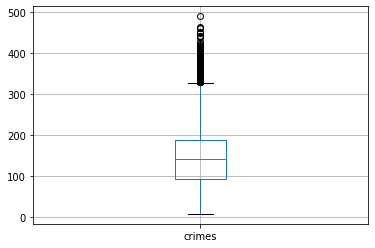

In [101]:
# data visulization 


data_mapping = pd.DataFrame(data_mapping_list)
data_mapping.boxplot(column='crimes')

In [102]:
# labeling severities with classes
Q1, M, Q3 = data_mapping['crimes'].quantile([0.25,0.5,0.75])
print(Q1, M, Q3)

# dividing severities with lables base on the distribution
data_mapping['crime_label'] = data_mapping['crimes'].apply(lambda x: "Safe" if x < Q1 else "Medium" if x < M else "Dangerous" if x < Q3 else "Super Dangerous")
print(data_mapping.head(5))

93.0 141.0 187.0
   county_code  month  day  hour  crimes crime_label
0            0      1    1     0     148   Dangerous
1            0      1    1     1      94      Medium
2            0      1    1     2     106      Medium
3            0      1    1     3      59        Safe
4            0      1    1     4      53        Safe


In [103]:
# SAVING AS A DATAFRAME

data_mapping.to_pickle('data_mapping.pkl')